In [1]:
import numpy as np
from math import pi
from matplotlib import pyplot
from scipy.linalg import block_diag

In [110]:
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3
m0=9.1e-31 # kg
m=m0/10

B=10 # Tesla
hwc=hbar*(elec*B/m)
lB=np.sqrt(hbar/(elec*B))
mu_sc=20*hwc #1e2*meV
D_sc=2*hwc #10*meV
nu=2
mu_n=nu*hwc #10*meV

ky_sw=np.linspace(0,1,100)*3/lB

Ls=20*lB
Lx=8*lB
Nx=300
kx=2*pi*np.arange(Nx)/(2*Lx+Ls)-pi*Nx/(2*Lx+Ls)
[k1,k2]=2*pi*np.mgrid[range(Nx),range(Nx)]/(2*Lx+Ls)-pi*Nx/(2*Lx+Ls)

Hx=np.diag(hbar**2 * kx**2/(2*m))

def y2(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c= np.exp(1j*k*Ls/2)*(-2j+np.exp(1j*k*Lx)*(2j+ 2*k*Lx- 1j* k**2 * Lx**2))/ (k**3) /(2*Lx+Ls)
        c[ ~ np.isfinite( c )] = Lx**3 /(3*(2*Lx+Ls))
    return c

def y1(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.exp(1j*k*Ls/2)*(-1+np.exp(1j*k*Lx)*(1- 1j* k * Lx))/ (k**2) /(2*Lx+Ls)
        c[ ~ np.isfinite( c )] = Lx**2 /(2*(2*Lx+Ls))
    return c

def y0(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = -1j*np.exp(1j*k*Ls/2)*(-1+np.exp(1j*k*Lx) )/(k*(2*Lx+Ls))
        c[ ~ np.isfinite( c )] = Lx /(2*Lx+Ls)
    return c

def y0s(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = 2*np.sin(k*Ls/2)/(k*(2*Lx+Ls))
        c[ ~ np.isfinite( c )] = Ls /(2*Lx+Ls)
    return c

HeB2= ((elec*B)**2 * np.real(y2(k1-k2)) )/ m
HeB2T= ((elec*B)**2 * np.real(y2(k2-k1)) )/ m
Hef= -( 2*mu_n*np.real(y0(k1-k2)) + mu_sc*y0s(k1-k2) )
HefT=-( 2*mu_n*np.real(y0(k2-k1)) + mu_sc*y0s(k2-k1) )
Hd= D_sc*y0s(k1-k2) 

Vn=np.zeros((2*Nx,2,len(ky_sw)), dtype=np.complex64)
En=np.zeros((2*Nx,len(ky_sw)))
for i_y in range(len(ky_sw)):
    ky=ky_sw[i_y]
    Hy=(hbar**2 * ky**2/(2*m))*np.eye(Nx)
    HeB1=-2j*hbar *ky* ( elec*B*np.imag(y1(k1-k2)))/m
    HeB1T=2j*hbar *ky* ( elec*B*np.imag(y1(k2-k1)))/m
    H1=Hx+Hy+HeB2+HeB1+Hef
    H1T=Hx+Hy+(HeB2T+HeB1T+HefT).conj()
    Hd_mat=np.kron(np.array([[0.,1.0],[0.,0.]]),Hd)
    H_t=block_diag(H1,-H1T)+Hd_mat+np.transpose(Hd_mat).conj()
    En[:,i_y], Vs =np.linalg.eigh(H_t)
    Vn[:,0,i_y]=Vs[:,Nx-1]
    Vn[:,1,i_y]=Vs[:,Nx]
        
print("Done!")

Done!


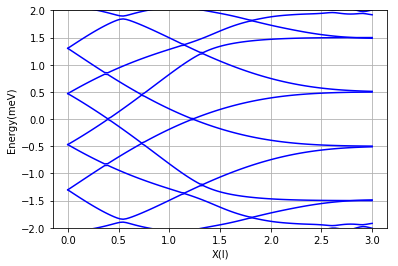

In [113]:
pyplot.figure()
pyplot.plot(ky_sw*lB,En.T/hwc,'b')
# pyplot.plot(ky_sw*lB,En[Nx-1,:].T/hwc,'r')
pyplot.ylabel("Energy(meV)")
pyplot.xlabel("X(l)")
# pyplot.ylim(-1,1)
pyplot.ylim(-2,2)
# pyplot.xlim(-7.5,7.5)
pyplot.grid()
pyplot.show()

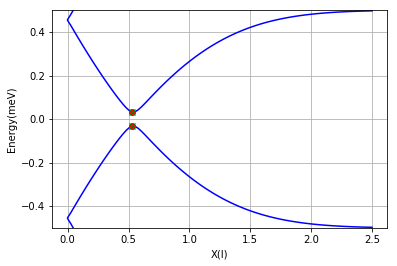

0.5303030303030303
[[ 0.12106836-1.15001461e-17j  0.60388687+3.46053088e-01j]
 [ 0.60388687-3.46053088e-01j -0.12106836-8.89496747e-17j]]


In [15]:
pyplot.figure()
# pyplot.plot(ky_sw/1e9,En.T/hwc)
pyplot.plot(ky_sw*lB,En.T/hwc,'b')
k_inds=[]
# i1=np.abs(np.diff(-En[Nx-1,:])).argsort()
# i2=np.diff(np.diff(En[Nx,:])).argsort()

# i1=np.abs(np.diff(-En[Nx-1,:])).argsort() 
# i2=np.abs(np.diff(En[Nx,:])).argsort() 
i1=np.abs(En[Nx-1,:]).argsort() 
i2=np.abs(En[Nx,:]).argsort() 
# for i_b in range(nu+1):
#     pyplot.plot(ky_sw[i1[i_b]]*lB,En[Nx-1,i1[i_b]]/hwc,'ro')
#     pyplot.plot(ky_sw[i2[i_b]]*lB,En[Nx,i2[i_b]]/hwc,'ro')
# print(i1[:2])
# print(i2[:2])
pyplot.plot(ky_sw[i1[:nu]]*lB,En[Nx-1,i1[:nu]]/hwc,'ro')
pyplot.plot(ky_sw[i2[:nu]]*lB,En[Nx,i2[:nu]]/hwc,'ro')


# pyplot.plot(ky_sw[k_inds]*lB,ky_sw[k_inds]*0,'ro')
pyplot.ylabel("Energy(meV)")
# pyplot.xlabel("ky(1/nm)")
pyplot.xlabel("X(l)")
# pyplot.ylim(-5,5)
pyplot.ylim(-.5,.5)
# pyplot.xlim(-7.5,7.5)
pyplot.grid()
ind=0
pyplot.plot(ky_sw[i1[ind]]*lB,En[Nx-1,i1[ind]]/hwc,'gx')
pyplot.plot(ky_sw[i2[ind]]*lB,En[Nx,i2[ind]]/hwc,'gx')
pyplot.show()

Vl=Vn[:,:,i1[ind]]
ky=ky_sw[i1[ind]]
print(ky*lB)
dHy=(hbar**2 * ky/m)*np.eye(Nx)
dHeB1=-2j*hbar * ( elec*B*np.imag(y1(k1-k2)))/m
dHeB1T=2j*hbar * ( elec*B*np.imag(y1(k2-k1)))/m
dH1=dHy+dHeB1
dH1T=dHy+dHeB1T.conj()
dH_t=block_diag(dH1,-dH1T)
dm = np.dot(np.transpose(Vl).conj(),np.dot(dH_t,Vl)) 
print(dm/hwc/lB)

In [47]:
# i,j= np.unravel_index(np.abs(En).argmin(), En.shape)
# print(En[i,j]/hwc)
# print(ky_sw[j]*lB)
# k_inds=[]
# for i_b in range(nu):
#     k_inds.append(np.abs(En[Nx-i_b,:]).argmin())
#     k_inds.append(np.abs(En[Nx+(i_b-1),:]).argmin())
    
# i1=np.abs(En[Nx-1,:]).argmin()
# i2=np.abs(En[Nx,:]).argmin()
# print(ky_sw[[i1,i2]]*lB)
# i= np.abs(En).argsort()
# print(i[:4])

0.0039950753230529774
0.5292062128096866
[-0.52920621  0.52920621]


Below is the code for QH-Barrier-QH only particle.

In [10]:
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3
m0=9.1e-31 # kg
m=m0/10

B=10 # Tesla
hwc=hbar*(elec*B/m)
lB=np.sqrt(hbar/(elec*B))
mu_sc=-20*hwc #1e2*meV

ky_sw=np.linspace(-1,1,140)*5/lB

Ls=40*lB
Lx=20*lB
Nx=200
kx=2*pi*np.arange(Nx)/(2*Lx+Ls)-pi*Nx/(2*Lx+Ls)
[k1,k2]=2*pi*np.mgrid[range(Nx),range(Nx)]/(2*Lx+Ls)-pi*Nx/(2*Lx+Ls)


Hx=np.diag(hbar**2 * kx**2/(2*m))

def y2(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c= np.exp(1j*k*Ls/2)*(-2j+np.exp(1j*k*Lx)*(2j+ 2*k*Lx- 1j* k**2 * Lx**2))/ (k**3) /(2*Lx+Ls)
        c[ ~ np.isfinite( c )] = Lx**3 /(3*(2*Lx+Ls))
    return c

def y1(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.exp(1j*k*Ls/2)*(-1+np.exp(1j*k*Lx)*(1- 1j* k * Lx))/ (k**2) /(2*Lx+Ls)
        c[ ~ np.isfinite( c )] = Lx**2 /(2*(2*Lx+Ls))
    return c

def y0(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = -1j*np.exp(1j*k*Ls/2)*(-1+np.exp(1j*k*Lx) )/(k*(2*Lx+Ls))
        c[ ~ np.isfinite( c )] = Lx /(2*Lx+Ls)
    return c

def y0s(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = 2*np.sin(k*Ls/2)/(k*(2*Lx+Ls))
        c[ ~ np.isfinite( c )] = Ls /(2*Lx+Ls)
    return c


HeB2= ((elec*B)**2 * np.real(y2(k1-k2)) )/ m
Hef= -mu_sc*y0s(k1-k2)

En=np.zeros((Nx,len(ky_sw)))
for i_y in range(len(ky_sw)):
    ky=ky_sw[i_y]
    Hy=(hbar**2 * ky**2/(2*m))*np.eye(Nx)
    HeB1=-2j*hbar *ky* ( elec*B*np.imag(y1(k1-k2)))/m
    H_t=Hx+Hy+HeB2+HeB1+Hef
    En[:,i_y], _ =np.linalg.eigh(H_t)
    
print("Done!")

Done!


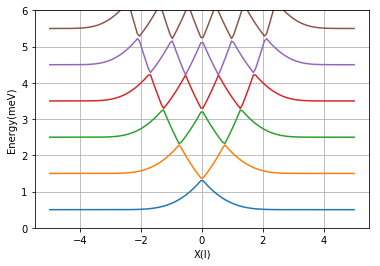

In [11]:
pyplot.figure()
# pyplot.plot(ky_sw/1e9,En.T/meV)
pyplot.plot(ky_sw*lB,En.T/hwc)
pyplot.ylabel("Energy(meV)")
# pyplot.xlabel("ky(1/nm)")
pyplot.xlabel("X(l)")
pyplot.ylim(0,6)
# pyplot.xlim(-7.5,7.5)
pyplot.grid()
pyplot.show()

In [301]:
a=np.reshape(range(4),[2,2])
b=np.reshape(range(4,8),[2,2])
Hd=sigma2+1j*sigma3
x=block_diag(a,b)+np.kron(np.array([[0.,1.0],[0.,0.]]),Hd)+np.kron(np.array([[0.,0.],[1.0,0.]]),np.transpose(Hd).conj())
print(x)

[[0.+0.j 1.+0.j 0.+1.j 0.-1.j]
 [2.+0.j 3.+0.j 0.+1.j 0.-1.j]
 [0.-1.j 0.-1.j 4.+0.j 5.+0.j]
 [0.+1.j 0.+1.j 6.+0.j 7.+0.j]]


In [348]:
print(D_sc/meV)

0.0
